## 수치형 데이터 시각화
- 수치형 데이터는 일정 범위 내에서 어떻게 분포(distribution)되어 있는지가 중요
- 이 분포를 알아야 데이터를 어떻게 변환 할지, 어떻게 해석해서 활용 할지 판단 가능

In [5]:
import seaborn as sns

df = sns.load_dataset('titanic')

In [6]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


### 히스토그램(histplot)
- 수치형 데이터의 구간별 빈도수를 나타내는 그래프
- histplot() 함수 사용

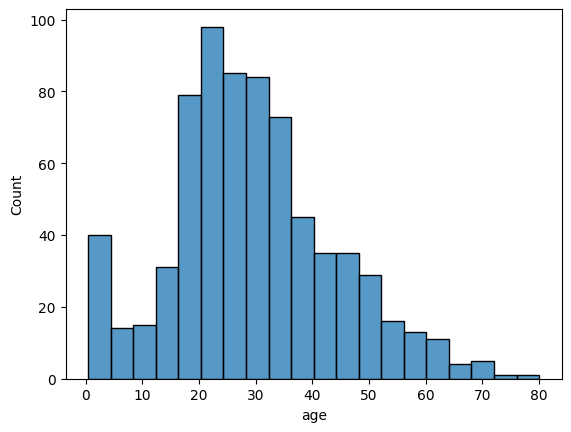

In [9]:
sns.histplot(data=df, x='age');

- bins 파라미터를 조정하여, 나이를 몇개의 구간으로 구분 하는지 설정 가능

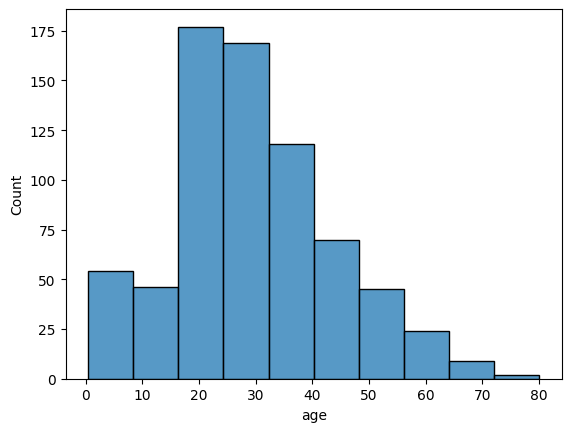

In [11]:
sns.histplot(data=df, x='age', bins=10);

- hue 옵션을 사용하여, 특정 범주형 데이터에 따른 히스토그램을 그릴 수 있음

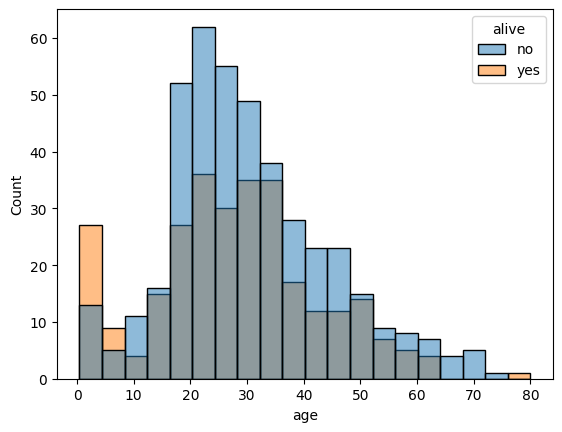

In [13]:
sns.histplot(data=df, x='age', hue='alive');

- 생존자 수와 사망자 수를 포개지 않고, 누적하여 표현 하고자 할 경우
- multiple 옵션을 'stack'으로 설정

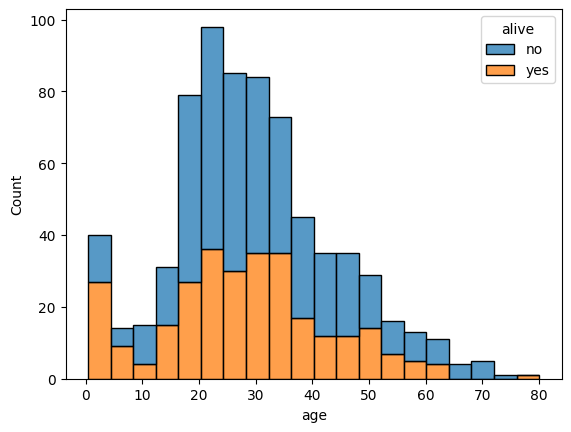

In [15]:
sns.histplot(data=df, x='age', hue='alive', multiple='stack');

### 커널밀도추정 함수 그래프(kdeplot)
- 히스토그램을 매끄럽게 곡선으로 연결한 그래프

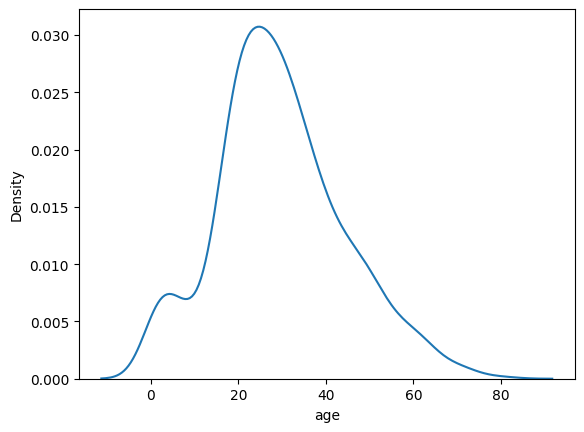

In [17]:
sns.kdeplot(data=df, x='age');

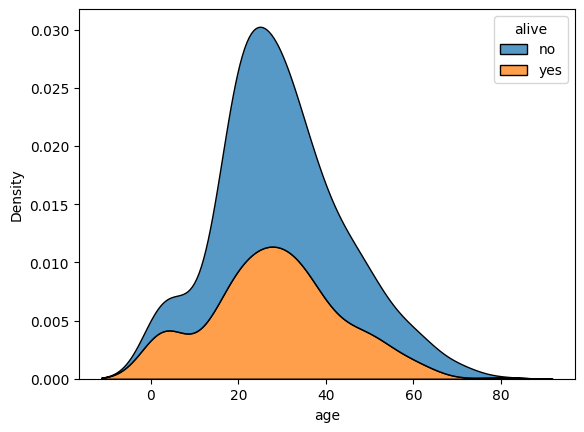

In [19]:
sns.kdeplot(data=df, x='age', hue='alive', multiple='stack');

### 분포도(displot)
- 수치형 데이터 하나의 분포를 나타내는 그래프로 많이 사용됨
- histplot, kdeplot 모두 그릴수 있음
- seaborn 0.11.0 부터 distplot() 에서 displot() 으로 바뀜

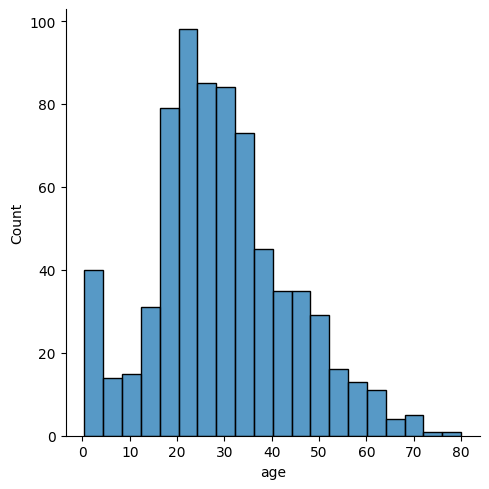

In [22]:
sns.displot(data=df, x='age');

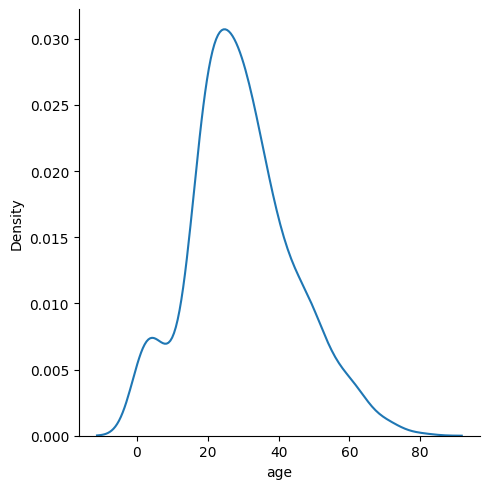

In [24]:
sns.displot(data=df, x='age', kind='kde');

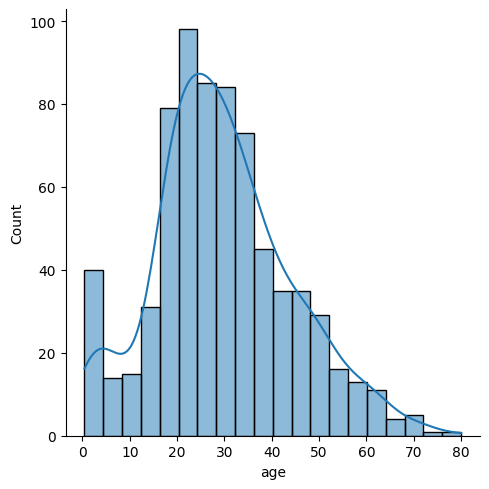

In [26]:
sns.displot(data=df, x='age', kde=True);

### 러그플롯(rugplot)
- 주변분포 (marginal distribution)을 나타내는 그래프
- 단독으로 사용되기 보단, 주로 다른 그래프와 함께 사용
- 단일 피쳐(여기서는 age)가 어떻게 분포되어 있는지를 x축 위에 작은 선분(러그)으로 표시
- 값이 밀집되어 있을 수록 선분들도 밀집되어 나타남

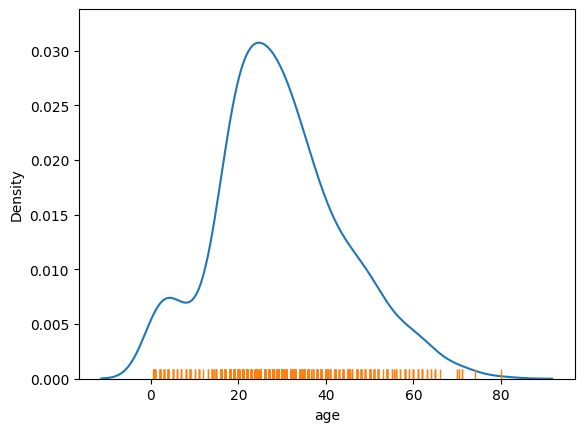

In [35]:
sns.kdeplot(data=df, x='age')
sns.rugplot(data=df, x='age');

## seaborn의 두 가지 함수
- [소스1](https://hwi-doc.tistory.com/entry/seaborn-%EC%99%84%EB%B2%BD-%EC%A0%95%EB%A6%AC)
- [소스2](https://seaborn.pydata.org/tutorial/function_overview.html)

<img src="../img/sns_fns.png" width="500"/>

### figure-level 함수
- figure-level 함수는 matplotlib 와 별개로 seaborn 의 figure를 만들어 그곳에 plotting 한다
- 따라서 figure-level 함수를 사용하여 seaborn 을 사용한 경우에는 facetgrid(seaborn의 figure)를 통해 레이아웃을 변경할 수 있다.
- 파라미터 종류, plot 종류 등 API 관련 정보 :  seaborn.pydata.org/api.html
- 특징 : label 이 그래프 밖에 있음
- 장점 : col 파라미터로 groupby를 할 수 있음

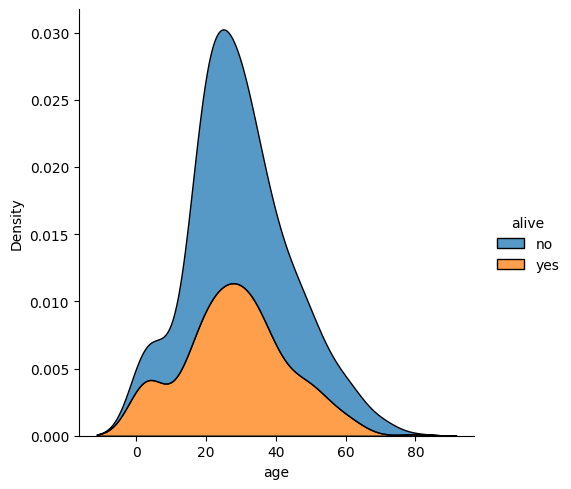

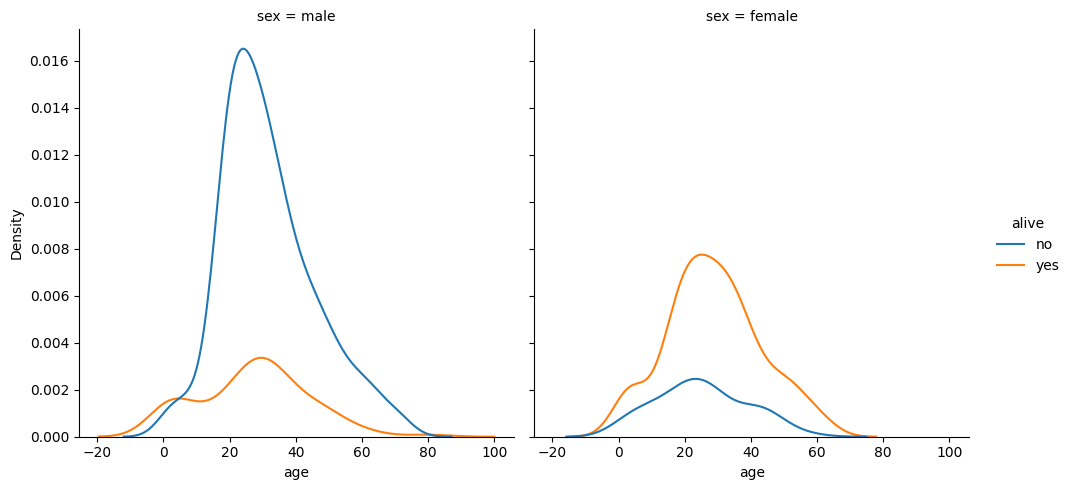

In [29]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

# 데이터 준비
df = sns.load_dataset("titanic")

# figure-level
# displot을 통해 figure을 확보하고 kind를 통해 함수 선택, kind가 없으면 default 인 histplot 선택
sns.displot(data=df, x="age", hue="alive", multiple="stack", kind="kde") 

# col을 활용한 groupby
g = sns.displot(data=df, x="age", hue="alive", col="sex", kind = 'kde')
# g.set_axis_labels('age','y') # x,y 축 이름을 변경할 수 있음

### axes-level 함수
- 말 그대로 axes 수준에 plotting 을 한다
- figure-level 과는 다르게 matplotlib 의 axes에 그린다.
- 따라서 이 경우에는 plt.figure() 와 같은 메소드로 레이아웃을 변경할 수 있다.
- matplotlib에 익숙하면 axes-level 함수로 사용하는게 효율적
- ax 파라미터를 통해 plotting 할 곳을 지정해줌
- label 이 그래프 안에 있음

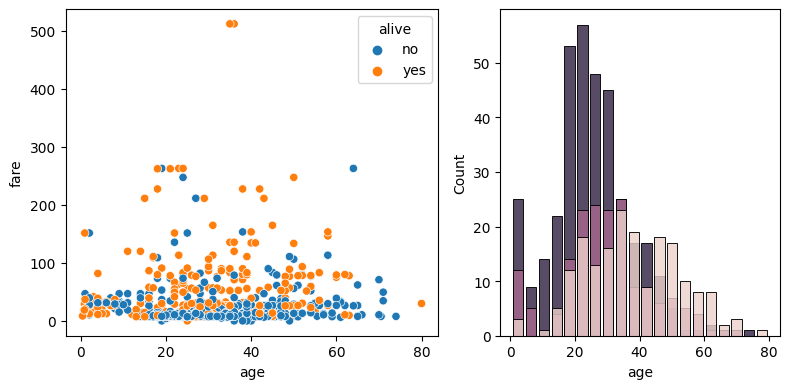

In [34]:
import matplotlib.pyplot as plt

f, axs = plt.subplots(1, 2, figsize=(8, 4), gridspec_kw=dict(width_ratios=[4, 3]))
 
sns.scatterplot(data=df, x="age", y="fare", hue="alive", ax=axs[0])
sns.histplot(data=df, x="age", hue="pclass", shrink=.8, alpha=.8, legend=False, ax=axs[1])
f.tight_layout()

## 범주형 데이터 시각화

### 막대 그래프(barplot)
- 범주형 데이터 값에 따라 수치형 데이터 값이 어떻게 달라지는지 파악
- barplot() 함수 사용
- 범주형 데이터에 따른 수치형 데이터의 평균과 신뢰구간
- 수치형 데이터 평균은 막대 높이로, 신뢰구간은 오차막대(error bar) 로 표현
- 원본 데이터를 복원 샘플링하여 얻은 표본을 활용, 평균과 신뢰구간을 구한다
- 즉, barplot()은 원본 데이터 평균이 아니라 샘플링한 데이터 평균을 구한다
- x 파라미터에 범주형 데이터를, y 파라미터에 수치형 데이터 전달

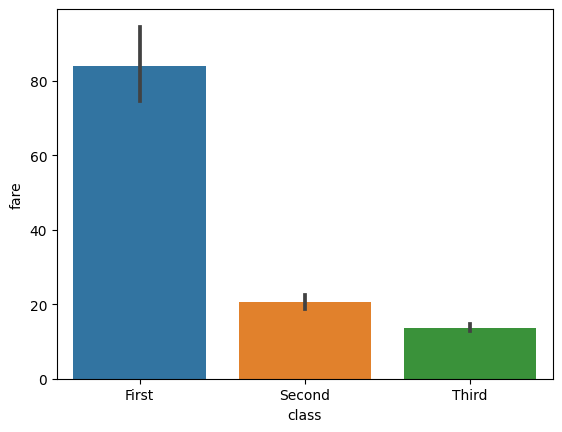

In [37]:
sns.barplot(data=df, x='class', y='fare');

- 다음은 타이타닉 탑승자 등급별 운임을 barplot()으로 시각화 한것
- 막대의 높이는 평균 운임, 막대 상단의 검은 세로줄은 오차 막대(신뢰구간)
- 등급이 높을 수록 평균 운임이 비싸고 신뢰구간이 넓어짐

### 포인트플롯(pointplot)
- 막대 그래프와 모양만 다를 뿐, 동일한 정보 제공
- 범주형 데이터에 따른 수치역 데이터의 평균과 신뢰구간
- 한 화면에 여러 그래프를 그릴때 사용

<Axes: xlabel='class', ylabel='fare'>

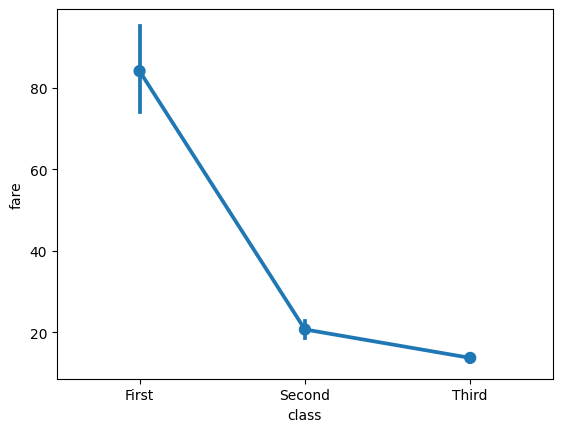

In [38]:
sns.pointplot(data=df, x='class', y='fare')

### 박스플롯(boxplot)
- 다음의 다섯가지 요약 정보를 제공
    - 제1사분위 수(Q1) : 전체 데이터의 하위 25%
    - 제2사분위 수(Q2) : 50%에 해당하는 값 (중앙값)
    - 제3사분위 수(Q3) : 상위 25%
    - 사분위 범위수(IQR) : Q3 - Q1
    - 최댓값 : Q3 + 1.5*IQR
    - 최솟값 : Q1 - 1.5*IQR    
    - 이상치 : 최댓값보다 크고 최솟값 보다 작은 값
- x 파라미터에 범주형, y에는 수치형 데이터 전달    

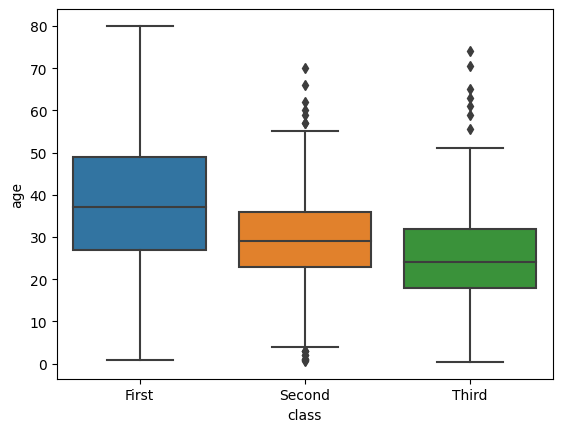

In [40]:
sns.boxplot(data=df, x='class', y='age');

### 바이올린플롯(violinplot)
- 박스플롯과 커널밀도추정 함수 그래프를 합친것
- violinplot() 함수 사용

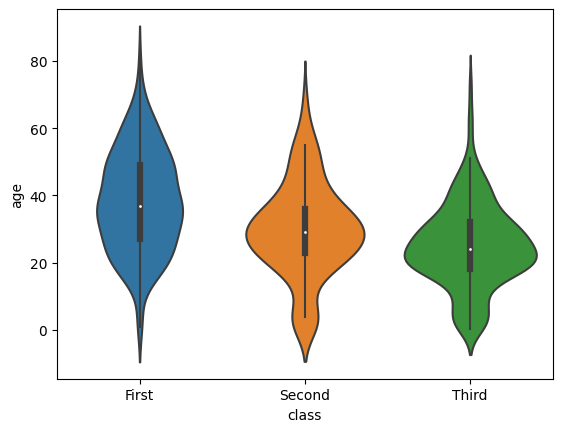

In [41]:
sns.violinplot(data=df, x='class', y='age');

- 성별에 따른 분포도 확인 가능

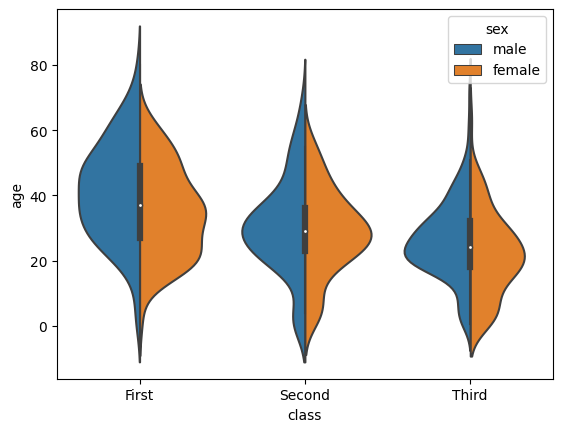

In [43]:
sns.violinplot(data=df, x='class', y='age', hue='sex', split=True);

### 카운트플롯(countplot)
- 범주형 데이터의 개수를 확인 할 때 사용
- countplot() 사용, x 에 범주형 데이터 전달

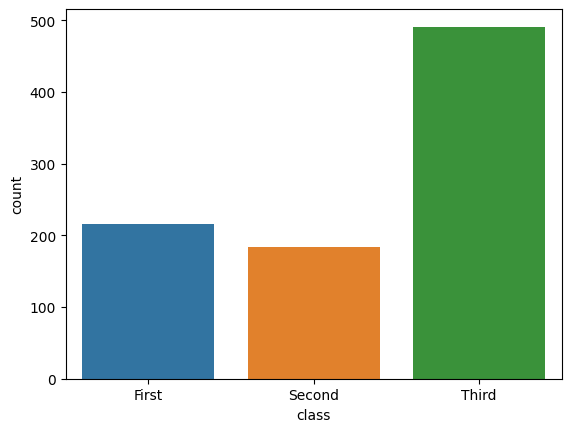

In [44]:
sns.countplot(data=df, x='class');

- x를 y로 바꾸면 그래프 방향을 바꿀 수 있음

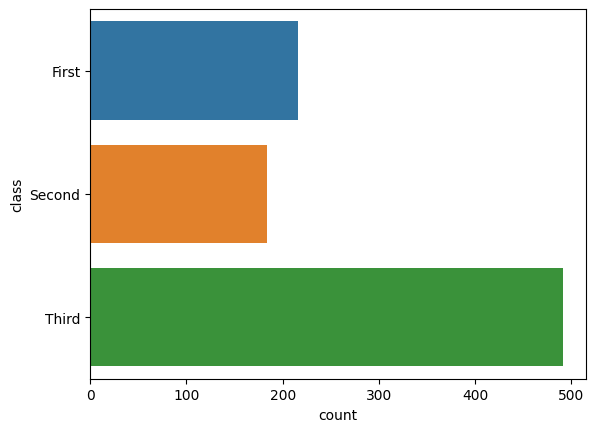

In [45]:
sns.countplot(data=df, y='class');

### barplot() vs countplot()
- barplot()은 범주형 데이터별 수치형 데이터의 평균
- countplot()은 범주형 데이터 하나만 받아, count 를 보여줌

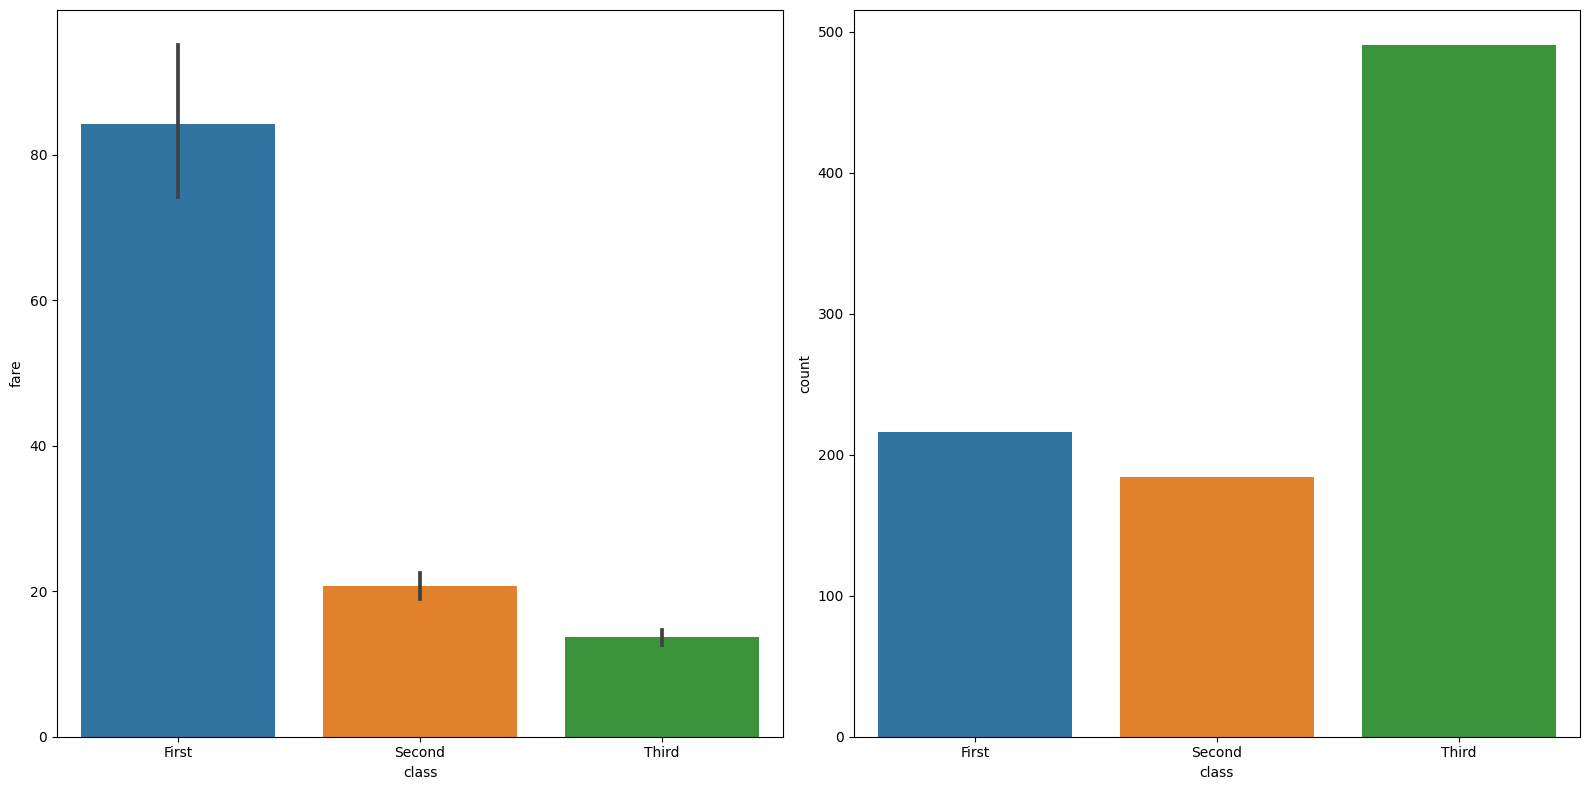

In [55]:
_, axs = plt.subplots(1, 2, figsize=(16,8),)
sns.barplot(data=df, x='class', y='fare', ax=axs[0])
sns.countplot(data=df, x='class', ax=axs[1])
plt.tight_layout()

- barplot은 평균이 아닌, 중앙값, 최댓값, 최솟값을 구할 수도 있음

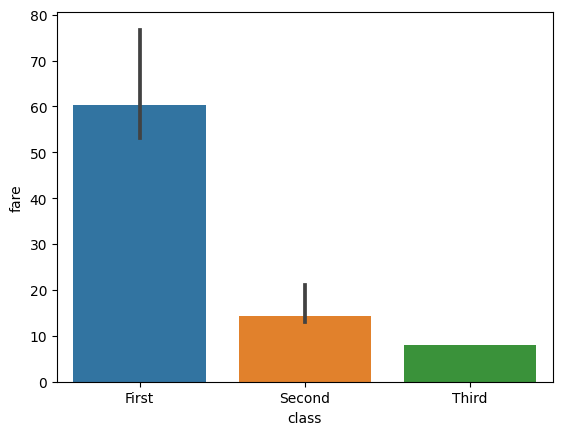

In [58]:
sns.barplot(data=df, x='class', y='fare', estimator=np.median);
# sns.barplot(data=df, x='class', y='fare', estimator=np.max)
# sns.barplot(data=df, x='class', y='fare', estimator=np.min)

### 파이 그래프(pie)
- 범주형 데이터별 비율ㅇ르 알아볼 때 사용하기 좋은 그래프
- seaborn은 지원하지 않음

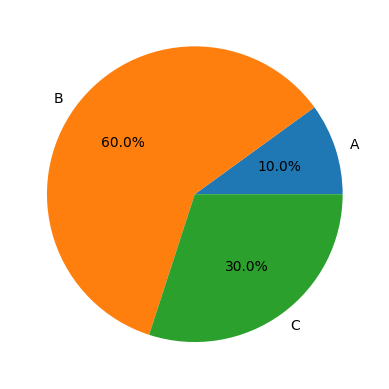

In [62]:
import matplotlib.pyplot as plt

x = [10, 60, 30]
y = ['A', 'B','C']
plt.pie(x=x, labels=y, autopct='%.1f%%');

## 데이터 관계 시각화
### 히트맵(heatmap)
- 데이터 간 관계를 색상으로 표현
- 비교해야 할 데이터가 많을 때 사용

In [68]:
import seaborn as sns

df = sns.load_dataset('flights')

In [69]:
df.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


- 각 연도의 월별 승객수를 알 수 있게 데이터 전처리

In [71]:
df_heat = df.pivot(index='month', columns='year', values='passengers')
df_heat

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


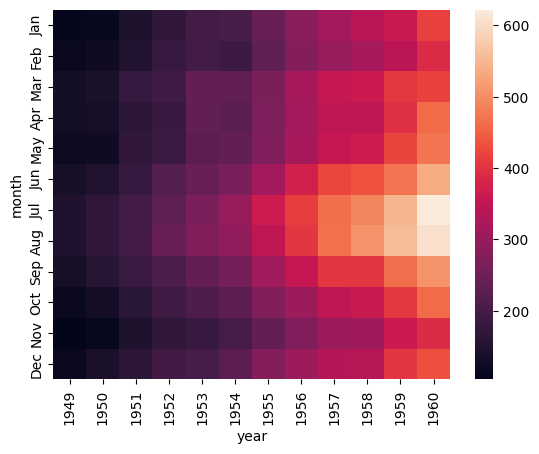

In [72]:
sns.heatmap(data=df_heat);

### 라인플롯(lineplot)
- 두 수치형 데이터 사이의 관계 시각화
- x에 전달한 값에 따른 y의 데이터의 평균과 95% 신뢰구간 표시

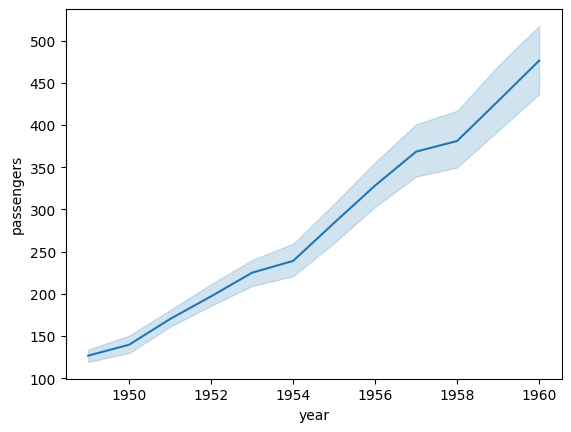

In [73]:
sns.lineplot(x='year', y='passengers', data=df);

### 산점도(scatterplot)
- 두 데이터의 관계를 점으로 표현

In [77]:
df = sns.load_dataset('tips')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [78]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


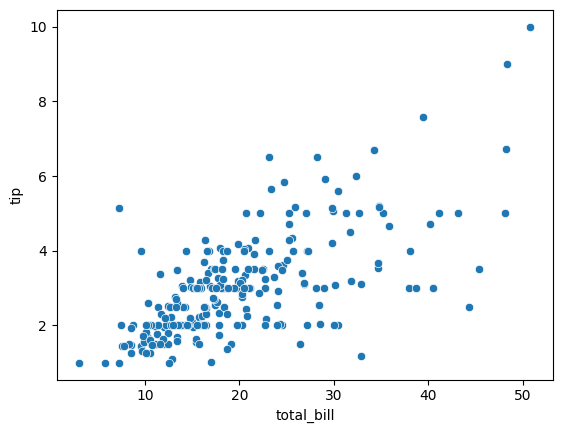

In [80]:
sns.scatterplot(x='total_bill', y='tip', data=df);

- hue 파라미터로 산점도를 특정 범주형 데이터별로 나누어 그릴 수 있음

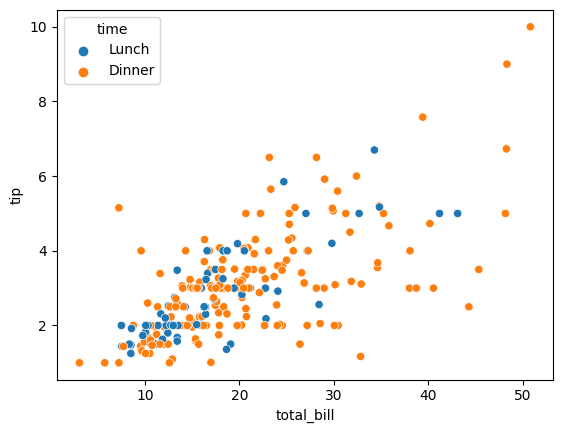

In [81]:
sns.scatterplot(data=df, x='total_bill', y='tip', hue='time');

### 회귀선을 포함한 산점도 그래프(regplot)
- 산점도와 선형 회귀선을 동시에 그러줌
- 회귀선을 그리면 전반적인 관계 파악이 용이

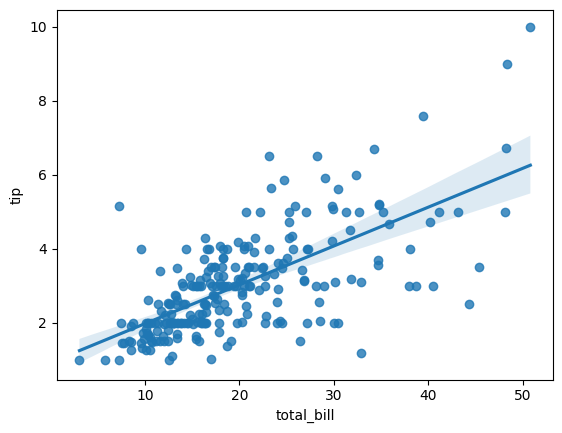

In [83]:
sns.regplot(data=df, x='total_bill', y='tip');

- 선형 회귀선 주변 음영은 95% 신뢰구간 의미
- 신뢰 구간을 99% 늘리려면 ci 파리미터에 99 전달

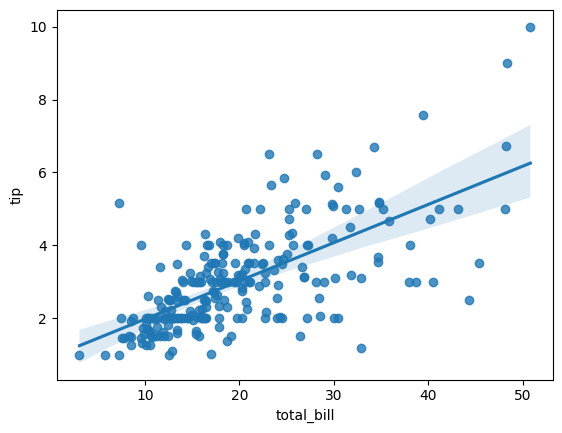

In [85]:
sns.regplot(data=df, x='total_bill', y='tip', ci=99);